# Hierarchical Clustering Analysis with Max Linkage
As described in this paper: http://www.econ.upf.edu/~michael/stanford/maeb7.pdf

### Basic Description

Hierarchical cluster analysis is an unsupervised clustering algorithm that tries to build a hierarchy of clusters. The datasets I will be working with all have a diagonal of zeroes. The A sample is represented by the diagonal. The values are also reflected across the diagonal. Each value is the dissimilarity value of two samples, A and the sample in question. For example, the first column and first row sample would be the dissimilarity value between A and A, which is zero. The first column and second row sample would be the dissimilarity value between A and B, which is 0.5. The grid including A, B, C, etc. is shown in the dendrogram graph.

The algorithm starts by finding the minimum value in the dataset. There should be at least 2 since the data is reflected across the diagonal. Then the value on the left side of the diagonal searches for the largest value in its row. The value on the left side of the diagonal searches for the largest value in its column. If the dataset is made correctly and the algorithm worked correctly, these two largest values should be the same. The minumum value is replaced with the found largest value. This largest value now represents the dissimilarity value between A and the row and column that were searched through. Then the row and column that were searched through are deleted, and the process begins again. This process is repeated until there is only a two by two square left which houses the maximum dissimilarity value. 

The clustering portion of this algorithm becomes more clear when the deleted rows and columns are summarized in a dendrogram. 

In [1]:
import numpy as np

def maxLinkage(data):
    data=np.array(data)
    iter = 0
    
    #Continue until there are only two columns
    while(len(data[0])>2):
        
        #Remove zeroes from list to find min
        listNoZeroes = np.ma.masked_equal(data, 0.0, copy=False)
        
        #Find minimum value
        least = listNoZeroes.min()
        index = np.where(data==least)
        
        #Change rows to max value between the two rows
        #Notice that the data will always be a square
        for z in range(len(data[0])):
            if(data[index[0][0]][z]!=0):
                data[index[0][0]][z] = max(data[index[0][0]][z], data[index[1][0]][z])
                
        #Change columns to max value between two columns
        for z in range(len(data[0])):
            if(data[z][index[0][0]]!=0):
                data[z][index[0][0]] = max(data[z][index[0][0]], data[z][index[1][0]])
                
        #Delete row and column where min value was
        data = np.delete(data,index[1][0], 0)
        data = np.delete(data,index[1][0], 1)
        
        print('Iteration: ', iter)
        print(data)
        print()
        iter +=1
        
    return data

In [2]:
#The dataset in the given paper
#Notice that the diagonals are zeroes and the values are reflected across diagonal.

data1 = [
[0, 0.5000, 0.4286, 1.0000, 0.2500, 0.6250, 0.3750],
[0.5000, 0, 0.7143, 0.8333, 0.6667, 0.2000, 0.7778],
[0.4286, 0.7143, 0, 1.0000, 0.4286, 0.6667, 0.3333],
[1.0000, 0.8333, 1.0000, 0, 1.0000, 0.8000, 0.8571],
[0.2500, 0.6667, 0.4286, 1.0000, 0, 0.7778, 0.3750],
[0.6250, 0.2000, 0.6667, 0.8000, 0.7778, 0, 0.7500],
[0.3750, 0.7778, 0.3333, 0.8571, 0.3750, 0.7500, 0]]

In [3]:
def plot_dendrogram(model, labelled, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plot = dendrogram(linkage_matrix, **kwargs, labels = labelled)

C:\Users\zacki\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Original
[[0.     0.5    0.4286 1.     0.25   0.625  0.375 ]
 [0.5    0.     0.7143 0.8333 0.6667 0.2    0.7778]
 [0.4286 0.7143 0.     1.     0.4286 0.6667 0.3333]
 [1.     0.8333 1.     0.     1.     0.8    0.8571]
 [0.25   0.6667 0.4286 1.     0.     0.7778 0.375 ]
 [0.625  0.2    0.6667 0.8    0.7778 0.     0.75  ]
 [0.375  0.7778 0.3333 0.8571 0.375  0.75   0.    ]]

Iteration:  0
[[0.     0.625  0.4286 1.     0.25   0.375 ]
 [0.625  0.     0.7143 0.8333 0.7778 0.7778]
 [0.4286 0.7143 0.     1.     0.4286 0.3333]
 [1.     0.8333 1.     0.     1.     0.8571]
 [0.25   0.7778 0.4286 1.     0.     0.375 ]
 [0.375  0.7778 0.3333 0.8571 0.375  0.    ]]

Iteration:  1
[[0.     0.7778 0.4286 1.     0.375 ]
 [0.7778 0.     0.7143 0.8333 0.7778]
 [0.4286 0.7143 0.     1.     0.3333]
 [1.     0.8333 1.     0.     0.8571]
 [0.375  0.7778 0.3333 0.8571 0.    ]]

Iteration:  2
[[0.     0.7778 0.4286 1.    ]
 [0.7778 0.     0.7778 0.8333]
 [0.4286 0.7778 0.     1.    ]
 [1.     0.8333 1.     0. 

array([[0., 1.],
       [1., 0.]])

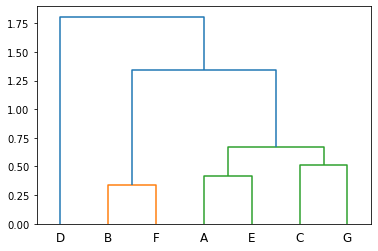

In [4]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#Dendrogram graph
labels = ['A','B','C','D','E','F','G']
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage = 'complete').fit(data1)
plot = plot_dendrogram(cluster, truncate_mode="level", p=3, labelled = labels)

print('Original')
print(np.array(data1))
print()
maxLinkage(data1)

The printed dendrogram looks exactly like the final dendrogram in the given paper. Now to try a made up matrix.

In [5]:
#Matrix with all zeroes in the diagonal
data = [[0, 1, 1, 2, 2, 1],
       [1, 0, 1, 1, 4, 1],
       [1, 1, 0, 2, 2, 0],
       [2, 1, 2, 0, 1, 2],
       [2, 4, 2, 1, 0, 2],
       [1, 1, 0, 2, 2, 0]]

Original
[[0 1 1 2 2 1]
 [1 0 1 1 4 1]
 [1 1 0 2 2 0]
 [2 1 2 0 1 2]
 [2 4 2 1 0 2]
 [1 1 0 2 2 0]]

Iteration:  0
[[0 1 2 4 1]
 [1 0 2 2 0]
 [2 2 0 1 2]
 [4 2 1 0 2]
 [1 0 2 2 0]]

Iteration:  1
[[0 2 4 1]
 [2 0 1 2]
 [4 1 0 2]
 [1 2 2 0]]

Iteration:  2
[[0 2 4]
 [2 0 1]
 [4 1 0]]

Iteration:  3
[[0 4]
 [4 0]]



C:\Users\zacki\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([[0, 4],
       [4, 0]])

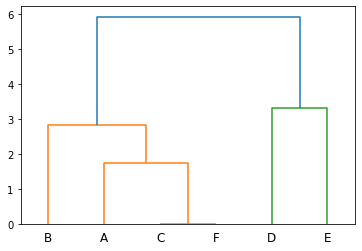

In [6]:
labels = ['A','B','C','D','E','F']
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage = 'complete').fit(data)
plot = plot_dendrogram(cluster, truncate_mode="level", p=3, labelled = labels)

print('Original')
print(np.array(data))
print()
maxLinkage(data)